<a href="https://colab.research.google.com/github/munisankar123/SleepStage/blob/main/multichanneldataprep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install pyedflib
!pip install pywavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 42.9 MB/s eta 0:00:00


In [6]:
import pyedflib
import numpy as np
import pandas as pd
edf_path = '/content/drive/MyDrive/capdatabae/n3.edf'
edf_file = pyedflib.EdfReader(edf_path)
edf_labels=edf_file.getSignalLabels()
edf_labels

['Fp2-F4',
 'F4-C4',
 'C4-P4',
 'P4-O2',
 'F8-T4',
 'T4-T6',
 'FP1-F3',
 'F3-C3',
 'C3-P3',
 'P3-O1',
 'F7-T3',
 'T3-T5',
 'C4-A1',
 'ROC-LOC',
 'EMG1-EMG2',
 'ECG1-ECG2',
 'DX1-DX2',
 'SX1-SX2',
 'SAO2',
 'HR',
 'PLETH',
 'STAT',
 'MIC']

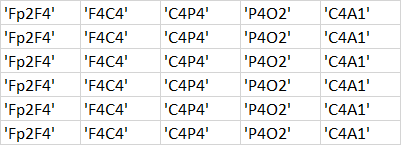

n3,n

In [7]:
[signal1,signal2,signal3,signal4,signal5]=[edf_file.readSignal(0),edf_file.readSignal(1),edf_file.readSignal(2),edf_file.readSignal(3),edf_file.readSignal(12)]

In [8]:
signaldata=[signal1,signal2,signal3,signal4,signal5]
signaldata

[array([ -6.94444444,  -8.31807082, -10.88217338, ..., -29.99084249,
        -28.61721612, -26.17521368]),
 array([-3.55616606, -2.02991453,  0.25946276, ..., 10.54639805,
        11.03479853, 11.49267399]),
 array([ 0.65628816,  1.41941392,  2.60989011, ..., 10.6990232 ,
        11.46214896, 12.16422466]),
 array([-1.54151404, -2.76251526, -4.56349206, ...,  6.3034188 ,
         6.82234432,  7.58547009]),
 array([ -4.96031746,  -8.53174603, -11.92002442, ...,   7.7991453 ,
          8.01282051,   8.53174603])]

In [10]:
annotations_file = pd.read_csv('/content/drive/MyDrive/capdatabae/n3.csv')
annotations_file

,Sleep_Stage,Time_[hh:mm:ss],Event,Duration[s],Location
0,W,23:06:12,SLEEP-S0,30,ROC-LOC
1,W,23:06:42,SLEEP-S0,30,ROC-LOC
2,S1,23:07:12,SLEEP-S1,30,ROC-LOC
3,S1,23:07:24,MCAP-A3,3,EEG-Fp2-F4
4,S1,23:07:30,MCAP-A3,3,EEG-Fp2-F4
...,...,...,...,...,...
1349,W,07:24:12,SLEEP-S0,30,ROC-LOC
1350,W,07:24:42,SLEEP-S0,30,ROC-LOC
1351,W,07:25:12,SLEEP-S0,30,ROC-LOC
1352,W,07:25:42,SLEEP-S0,30,ROC-LOC


In [12]:
starttime = 0
fs = 512
labeled_segments = []

# Assuming you have 7 channels
signaldata = [edf_file.readSignal(0),edf_file.readSignal(1),edf_file.readSignal(2),edf_file.readSignal(3),edf_file.readSignal(12)]

for idx, row in annotations_file.iterrows():
    duration = row['Duration[s]']
    endtime = starttime + (fs * duration)
    if endtime <= len(signaldata[0]):  # Assuming all signals have the same length
        if duration == 30:
            # Extract the segment for each channel
            segment = {f'Signal_{i+1}': signal[starttime:endtime] for i, signal in enumerate(signaldata)}
            segment['Sleep_Stage'] = row['Sleep_Stage']  # Add the sleep stage
            labeled_segments.append(segment)
        starttime = endtime  # Update starttime for the next segment
    else:
        break


data = pd.DataFrame(labeled_segments)
data

,Signal_1,Signal_2,Signal_3,Signal_4,Signal_5,Sleep_Stage
0,"[-6.944444444444445, -8.318070818070817, -10.8...","[-3.556166056166056, -2.02991452991453, 0.2594...","[0.6562881562881563, 1.4194139194139195, 2.609...","[-1.5415140415140414, -2.7625152625152625, -4....","[-4.9603174603174605, -8.531746031746032, -11....",W
1,"[24.526862026862027, 24.374236874236875, 24.16...","[6.181318681318682, 5.7234432234432235, 5.3266...","[1.6636141636141635, 1.2667887667887667, 0.686...","[-2.1214896214896215, -2.3351648351648353, -2....","[14.545177045177045, 9.691697191697191, 5.6013...",W
2,"[-16.46825396825397, -10.576923076923077, 1.63...","[-3.250915750915751, -3.0982905982905984, -4.4...","[5.418192918192918, 5.387667887667887, 4.96031...","[-4.624542124542124, -4.594017094017094, -4.25...","[4.38034188034188, 7.158119658119658, 8.653846...",S1
3,"[4.9603174603174605, 4.441391941391942, 4.1971...","[4.838217338217338, 4.868742368742368, 4.74664...","[7.066544566544566, 7.4633699633699635, 7.9212...","[-6.12026862026862, -5.692918192918193, -4.960...","[-1.3278388278388278, 0.25946275946275943, 0.7...",S1
4,"[10.729548229548229, 10.82112332112332, 10.882...","[3.159340659340659, 2.487789987789988, 1.81623...","[5.906593406593406, 5.326617826617826, 4.77716...","[9.325396825396824, 8.37912087912088, 7.310744...","[106.6086691086691, 109.47802197802197, 111.37...",S1
...,...,...,...,...,...,...
994,"[-10.21062271062271, -10.912698412698413, -11....","[-3.5866910866910864, -3.891941391941392, -4.1...","[3.3424908424908426, 3.556166056166056, 3.7393...","[-0.6562881562881563, 0.10683760683760683, 0.8...","[14.514652014652015, 17.048229548229546, 19.49...",W
995,"[-0.3205128205128205, 0.1984126984126984, 0.80...","[4.990842490842491, 4.685592185592186, 4.44139...","[4.014041514041514, 3.5866910866910864, 3.0067...","[3.0982905982905984, 2.731990231990232, 2.2741...","[13.995726495726496, 13.385225885225886, 12.46...",W
996,"[0.10683760683760683, -0.0763125763125763, -0....","[3.9529914529914527, 3.7698412698412698, 3.434...","[2.3351648351648353, 2.457264957264957, 2.4877...","[1.7857142857142856, 2.457264957264957, 3.2509...","[11.340048840048839, 12.072649572649572, 13.01...",W
997,"[1.9688644688644688, 1.572039072039072, 1.0836...","[-0.992063492063492, -1.1446886446886446, -1.3...","[-4.197191697191697, -4.38034188034188, -4.502...","[-5.479242979242979, -5.479242979242979, -5.41...","[-1.2057387057387057, -1.0836385836385836, -0....",W


In [13]:
num_segments = len(labeled_segments)
print(f"Number of segments extracted: {num_segments}")
num_30_sec_durations = annotations_file[annotations_file['Duration[s]'] == 30].shape[0]
print(f"Number of 30-second durations: {num_30_sec_durations}")


Number of segments extracted: 999
Number of 30-second durations: 999


In [15]:
stages = data['Sleep_Stage']

eegdata = data.drop(columns=['Sleep_Stage'])

In [16]:
def reshape_matrix_to_row(matrix):
    return matrix.flatten()
reshaped_data1 = eegdata['Signal_1'].apply(lambda x: pd.Series(reshape_matrix_to_row(x)))
reshaped_data1 = reshaped_data1.reset_index(drop=True)
reshaped_data1

,0,1,2,3,4,5,6,7,8,9,...,15350,15351,15352,15353,15354,15355,15356,15357,15358,15359
0,-6.944444,-8.318071,-10.882173,-13.782051,-16.559829,-19.032357,-21.108059,-22.847985,-24.221612,-25.289988,...,27.579365,27.701465,27.365690,26.694139,25.961538,25.534188,25.412088,25.228938,24.832112,24.587912
1,24.526862,24.374237,24.160562,23.977411,23.885836,23.672161,23.244811,22.878510,23.061661,23.702686,...,14.575702,5.448718,-1.938339,-3.189866,-1.175214,-1.388889,-5.418193,-11.156899,-15.338828,-16.987179
2,-16.468254,-10.576923,1.633089,12.255800,15.338828,18.086081,27.029915,32.799145,25.564713,9.081197,...,-6.639194,-6.700244,-7.066545,-7.677045,-8.440171,-9.294872,-10.027473,-10.637973,-10.973748,-11.126374
3,4.960317,4.441392,4.197192,4.197192,4.380342,4.868742,5.815018,7.097070,8.012821,8.012821,...,11.278999,10.973748,10.821123,10.882173,10.973748,10.943223,10.851648,10.790598,10.821123,10.760073
4,10.729548,10.821123,10.882173,10.729548,10.393773,10.180098,9.996947,9.661172,8.989621,8.348596,...,19.520757,21.382784,23.611111,26.541514,29.380342,31.242369,31.425519,29.838217,26.755189,22.878510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,-10.210623,-10.912698,-11.523199,-12.133700,-12.744200,-13.324176,-13.812576,-14.087302,-14.117827,-14.056777,...,-6.303419,-5.876068,-5.235043,-4.532967,-3.830891,-3.189866,-2.579365,-1.968864,-1.327839,-0.808913
995,-0.320513,0.198413,0.808913,1.510989,2.335165,3.220391,4.166667,5.051893,5.845543,6.486569,...,-2.609890,-2.213065,-1.816239,-1.419414,-1.022589,-0.656288,-0.320513,-0.045788,0.106838,0.167888
996,0.106838,-0.076313,-0.442613,-0.839438,-1.236264,-1.602564,-1.999389,-2.396215,-2.823565,-3.189866,...,0.045788,0.289988,0.564713,0.839438,1.175214,1.572039,1.907814,2.090965,2.182540,2.152015
997,1.968864,1.572039,1.083639,0.503663,-0.076313,-0.564713,-0.869963,-1.053114,-1.083639,-0.961538,...,-7.982295,-7.799145,-7.615995,-7.493895,-7.463370,-7.554945,-7.768620,-7.951770,-8.104396,-8.287546


In [17]:

reshaped_data4 = eegdata['Signal_4'].apply(lambda x: pd.Series(reshape_matrix_to_row(x)))
reshaped_data4 = reshaped_data4.reset_index(drop=True)
reshaped_data4

,0,1,2,3,4,5,6,7,8,9,...,15350,15351,15352,15353,15354,15355,15356,15357,15358,15359
0,-1.541514,-2.762515,-4.563492,-6.517094,-8.348596,-9.935897,-11.309524,-12.438950,-13.293651,-13.873626,...,-5.479243,-5.326618,-5.082418,-4.807692,-4.441392,-3.922466,-3.373016,-2.976190,-2.640415,-2.304640
1,-2.121490,-2.335165,-2.793040,-3.250916,-3.617216,-4.044567,-4.655067,-5.509768,-6.394994,-7.127595,...,-3.525641,-3.342491,-3.342491,-3.525641,-3.617216,-3.708791,-3.983516,-4.227717,-4.441392,-4.563492
2,-4.624542,-4.594017,-4.258242,-3.617216,-2.884615,-2.304640,-2.029915,-2.090965,-2.182540,-1.999389,...,1.755189,1.785714,1.846764,1.999389,2.060440,1.999389,2.029915,2.090965,1.877289,1.297314
3,-6.120269,-5.692918,-4.960317,-3.952991,-3.067766,-2.518315,-2.518315,-2.976190,-3.647741,-4.166667,...,11.981074,12.805250,13.263126,13.354701,13.171551,12.866300,12.408425,11.767399,10.973748,10.149573
4,9.325397,8.379121,7.310745,6.089744,4.807692,3.556166,2.457265,1.449939,0.442613,-0.442613,...,-0.961538,-1.114164,-1.388889,-1.724664,-1.816239,-1.572039,-1.144689,-0.625763,-0.198413,0.076313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,-0.656288,0.106838,0.869963,1.572039,2.090965,2.518315,2.854090,3.220391,3.495116,3.495116,...,3.281441,3.128816,3.098291,3.220391,3.311966,3.403541,3.434066,3.434066,3.373016,3.281441
995,3.098291,2.731990,2.274115,1.846764,1.449939,1.022589,0.625763,0.228938,-0.015263,-0.198413,...,3.495116,2.426740,1.480464,0.717338,0.289988,0.137363,0.228938,0.442613,0.778388,1.236264
996,1.785714,2.457265,3.250916,4.166667,5.021368,5.723443,6.394994,6.944444,7.341270,7.615995,...,-4.777167,-4.960317,-5.082418,-5.082418,-5.021368,-4.990842,-5.051893,-5.235043,-5.387668,-5.479243
997,-5.479243,-5.479243,-5.418193,-5.265568,-4.990842,-4.624542,-4.349817,-4.227717,-4.166667,-4.105617,...,5.937118,5.845543,5.692918,5.601343,5.631868,5.815018,6.028694,6.333944,6.761294,7.280220


In [18]:

reshaped_data3 = eegdata['Signal_3'].apply(lambda x: pd.Series(reshape_matrix_to_row(x)))
reshaped_data3 = reshaped_data3.reset_index(drop=True)
reshaped_data3

,0,1,2,3,4,5,6,7,8,9,...,15350,15351,15352,15353,15354,15355,15356,15357,15358,15359
0,0.656288,1.419414,2.609890,3.952991,5.265568,6.517094,7.585470,8.470696,9.111722,9.539072,...,1.388889,1.297314,1.205739,1.083639,0.961538,0.992063,1.266789,1.602564,1.785714,1.816239
1,1.663614,1.266789,0.686813,0.137363,-0.228938,-0.442613,-0.625763,-0.808913,-1.053114,-1.388889,...,0.473138,1.297314,1.785714,1.938339,2.152015,2.579365,3.159341,3.800366,4.410867,5.021368
2,5.418193,5.387668,4.960317,4.380342,3.800366,3.006716,1.602564,0.015263,-0.992063,-1.175214,...,0.381563,0.259463,0.137363,0.015263,-0.198413,-0.595238,-0.961538,-1.297314,-1.633089,-1.999389
3,7.066545,7.463370,7.921245,8.379121,8.684371,8.806471,8.684371,8.318071,7.860195,7.432845,...,7.524420,7.921245,8.287546,8.714896,8.898046,8.653846,8.104396,7.554945,7.036020,6.486569
4,5.906593,5.326618,4.777167,4.319292,4.044567,3.891941,3.800366,3.891941,4.014042,4.075092,...,1.205739,0.717338,0.076313,-0.595238,-0.961538,-0.717338,-0.076313,0.595238,1.114164,1.388889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3.342491,3.556166,3.739316,3.952991,4.227717,4.471917,4.685592,4.899267,5.051893,5.235043,...,3.342491,3.647741,3.952991,4.197192,4.410867,4.594017,4.746642,4.746642,4.594017,4.380342
995,4.014042,3.586691,3.006716,2.365690,1.755189,1.327839,1.022589,0.717338,0.381563,0.045788,...,0.289988,0.534188,0.839438,1.083639,1.236264,1.388889,1.572039,1.785714,1.999389,2.182540
996,2.335165,2.457265,2.487790,2.487790,2.670940,2.976190,3.250916,3.464591,3.617216,3.739316,...,-2.304640,-2.426740,-2.701465,-2.976190,-3.189866,-3.342491,-3.434066,-3.525641,-3.678266,-3.922466
997,-4.197192,-4.380342,-4.502442,-4.471917,-4.319292,-3.983516,-3.495116,-3.006716,-2.640415,-2.274115,...,11.614774,11.828449,11.889499,11.920024,11.889499,11.828449,11.736874,11.675824,11.584249,11.431624


In [19]:

reshaped_data2 = eegdata['Signal_2'].apply(lambda x: pd.Series(reshape_matrix_to_row(x)))
reshaped_data2 = reshaped_data2.reset_index(drop=True)
reshaped_data2

,0,1,2,3,4,5,6,7,8,9,...,15350,15351,15352,15353,15354,15355,15356,15357,15358,15359
0,-3.556166,-2.029915,0.259463,2.793040,5.143468,7.219170,8.898046,10.241148,11.248474,11.889499,...,6.517094,6.791819,7.066545,7.249695,7.249695,7.127595,7.036020,7.005495,6.913919,6.639194
1,6.181319,5.723443,5.326618,4.960317,4.746642,4.685592,4.868742,5.112943,5.418193,5.723443,...,-13.659951,-10.637973,-8.104396,-7.432845,-7.890720,-7.951770,-7.188645,-6.150794,-5.143468,-4.136142
2,-3.250916,-3.098291,-4.410867,-6.608669,-8.501221,-10.210623,-13.171551,-16.376679,-16.712454,-14.209402,...,-6.578144,-6.852869,-7.158120,-7.432845,-7.677045,-8.043346,-8.470696,-8.959096,-9.478022,-9.905372
3,4.838217,4.868742,4.746642,4.532967,4.227717,3.952991,3.617216,3.189866,2.915140,2.884615,...,1.663614,2.243590,2.884615,3.708791,4.441392,4.746642,4.594017,4.258242,3.952991,3.647741
4,3.159341,2.487790,1.816239,1.419414,1.388889,1.510989,1.602564,1.602564,1.510989,1.388889,...,-3.250916,-3.311966,-3.220391,-2.701465,-1.633089,-0.473138,0.534188,1.358364,1.907814,2.121490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,-3.586691,-3.891941,-4.105617,-4.197192,-4.197192,-4.075092,-3.800366,-3.250916,-2.426740,-1.480464,...,2.426740,3.128816,3.769841,4.319292,4.807692,5.143468,5.357143,5.418193,5.357143,5.235043
995,4.990842,4.685592,4.441392,4.227717,4.044567,3.891941,3.830891,3.769841,3.708791,3.434066,...,-1.541514,-0.961538,-0.167888,0.656288,1.541514,2.304640,2.945665,3.434066,3.800366,3.983516
996,3.952991,3.769841,3.434066,2.945665,2.274115,1.541514,0.931013,0.534188,0.351038,0.351038,...,-3.403541,-3.006716,-2.609890,-2.274115,-2.029915,-1.816239,-1.572039,-1.297314,-1.083639,-0.961538
997,-0.992063,-1.144689,-1.358364,-1.602564,-1.785714,-1.968864,-2.060440,-2.090965,-1.968864,-1.755189,...,1.602564,1.785714,1.846764,1.755189,1.602564,1.541514,1.633089,1.816239,1.907814,1.999389


In [20]:

reshaped_data5 = eegdata['Signal_5'].apply(lambda x: pd.Series(reshape_matrix_to_row(x)))
reshaped_data5 = reshaped_data5.reset_index(drop=True)
reshaped_data5

,0,1,2,3,4,5,6,7,8,9,...,15350,15351,15352,15353,15354,15355,15356,15357,15358,15359
0,-4.960317,-8.531746,-11.920024,-14.942002,-17.353480,-18.971306,-19.673382,-19.490232,-18.666056,-17.567155,...,4.319292,8.104396,10.576923,12.255800,14.209402,16.346154,18.482906,20.009158,19.917582,18.025031
1,14.545177,9.691697,5.601343,5.570818,8.928571,12.683150,16.010379,18.116606,18.666056,18.940781,...,-21.749084,-24.954212,-26.358364,-26.480464,-25.656288,-23.275336,-18.605006,-12.377900,-5.967643,0.015263
2,4.380342,7.158120,8.653846,9.661172,11.248474,13.293651,15.949328,21.535409,30.692918,41.346154,...,-21.382784,-17.139805,-13.690476,-11.217949,-8.104396,-4.899267,-3.159341,-3.586691,-3.647741,-0.961538
3,-1.327839,0.259463,0.778388,-1.633089,-5.601343,-8.623321,-8.806471,-3.891941,5.448718,14.484127,...,93.543956,95.985958,95.650183,92.414530,88.568376,86.797924,88.324176,92.597680,97.817460,102.640415
4,106.608669,109.478022,111.370574,112.683150,113.812576,114.545177,113.995726,111.828449,109.233822,107.921245,...,40.583028,39.117827,29.105617,13.232601,-4.044567,-18.757631,-28.220391,-31.303419,-31.425519,-31.974969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,14.514652,17.048230,19.490232,21.626984,23.336386,24.557387,25.351038,25.625763,25.473138,25.045788,...,15.674603,15.155678,15.003053,15.064103,15.186203,15.247253,15.186203,14.942002,14.575702,14.300977
995,13.995726,13.385226,12.469475,11.340049,10.027473,8.501221,6.852869,5.143468,3.617216,2.579365,...,19.001832,15.369353,11.981074,10.149573,9.600122,9.661172,9.905372,10.149573,10.424298,10.790598
996,11.340049,12.072650,13.018926,14.087302,15.125153,16.040904,16.804029,17.384005,17.902930,18.543956,...,-6.120269,-5.204518,-4.349817,-3.525641,-2.793040,-2.243590,-1.785714,-1.480464,-1.327839,-1.297314
997,-1.205739,-1.083639,-0.778388,-0.289988,0.259463,0.808913,0.839438,0.381563,0.076313,0.137363,...,25.564713,25.259463,25.106838,25.045788,25.045788,24.984737,24.740537,24.465812,24.282662,24.160562


In [23]:
from scipy.signal import butter, filtfilt
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data, axis=0)
    return y
lowcut = 0.2
highcut = 30.0
fs = 512
x_bal_np1 = reshaped_data1.to_numpy()
x_bal_filtered1 = np.apply_along_axis(lambda x: butter_bandpass_filter(x, lowcut, highcut, fs), axis=1, arr=x_bal_np1)
x_bal_filtered1 = pd.DataFrame(x_bal_filtered1)


x_bal_np2 = reshaped_data2.to_numpy()
x_bal_filtered2 = np.apply_along_axis(lambda x: butter_bandpass_filter(x, lowcut, highcut, fs), axis=1, arr=x_bal_np2)
x_bal_filtered2 = pd.DataFrame(x_bal_filtered2)


x_bal_np3 = reshaped_data3.to_numpy()
x_bal_filtered3 = np.apply_along_axis(lambda x: butter_bandpass_filter(x, lowcut, highcut, fs), axis=1, arr=x_bal_np3)
x_bal_filtered3 = pd.DataFrame(x_bal_filtered3)


x_bal_np4 = reshaped_data4.to_numpy()
x_bal_filtered4 = np.apply_along_axis(lambda x: butter_bandpass_filter(x, lowcut, highcut, fs), axis=1, arr=x_bal_np4)
x_bal_filtered4 = pd.DataFrame(x_bal_filtered4)


x_bal_np5 = reshaped_data5.to_numpy()
x_bal_filtered5 = np.apply_along_axis(lambda x: butter_bandpass_filter(x, lowcut, highcut, fs), axis=1, arr=x_bal_np5)
x_bal_filtered5 = pd.DataFrame(x_bal_filtered5)




In [24]:
x_bal_1 = x_bal_filtered1
y_bal_1 = stages
segment_duration = 2
sampling_rate = 512
segment_length = segment_duration * sampling_rate
segments = []
labels = []
x_bal_1=np.array(x_bal_1)
y_bal_1=np.array(y_bal_1)
for i, signal in enumerate(x_bal_1):
    for start in range(0, len(signal) - segment_length + 1, segment_length):
        segment = signal[start:start + segment_length]
        segments.append(segment)
        labels.append(y_bal_1[i])
segments_np = np.array(segments)
labels_np = np.array(labels)
two_segments = pd.DataFrame(segments_np)
two_labels = pd.DataFrame(labels_np, columns=['label'])
df1 = pd.concat([two_segments, two_labels], axis=1)

In [25]:
x_bal_2 = x_bal_filtered2
y_bal_1 = stages
segment_duration = 2
sampling_rate = 512
segment_length = segment_duration * sampling_rate
segments = []
labels = []
x_bal_2=np.array(x_bal_2)
y_bal_1=np.array(y_bal_1)
for i, signal in enumerate(x_bal_2):
    for start in range(0, len(signal) - segment_length + 1, segment_length):
        segment = signal[start:start + segment_length]
        segments.append(segment)
        labels.append(y_bal_1[i])
segments_np = np.array(segments)
labels_np = np.array(labels)
two_segments = pd.DataFrame(segments_np)
two_labels = pd.DataFrame(labels_np, columns=['label'])
df2 = pd.concat([two_segments, two_labels], axis=1)
df2

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,-6.514122e+39,-6.493532e+39,-6.473007e+39,-6.452547e+39,-6.432152e+39,-6.411821e+39,-6.391554e+39,-6.371351e+39,-6.351213e+39,-6.331138e+39,...,-2.632922e+38,-2.624657e+38,-2.616420e+38,-2.608208e+38,-2.600023e+38,-2.591864e+38,-2.583732e+38,-2.575625e+38,-2.567544e+38,W
1,-2.559490e+38,-2.551460e+38,-2.543457e+38,-2.535479e+38,-2.527527e+38,-2.519600e+38,-2.511698e+38,-2.503822e+38,-2.495971e+38,-2.488145e+38,...,-1.099301e+37,-1.095871e+37,-1.092451e+37,-1.089042e+37,-1.085644e+37,-1.082257e+37,-1.078880e+37,-1.075514e+37,-1.072158e+37,W
2,-1.068813e+37,-1.065478e+37,-1.062154e+37,-1.058840e+37,-1.055536e+37,-1.052243e+37,-1.048960e+37,-1.045688e+37,-1.042425e+37,-1.039173e+37,...,-4.521547e+35,-4.507250e+35,-4.492998e+35,-4.478791e+35,-4.464629e+35,-4.450512e+35,-4.436440e+35,-4.422413e+35,-4.408430e+35,W
3,-4.394491e+35,-4.380597e+35,-4.366747e+35,-4.352941e+35,-4.339179e+35,-4.325461e+35,-4.311786e+35,-4.298154e+35,-4.284566e+35,-4.271021e+35,...,-1.805472e+34,-1.799806e+34,-1.794158e+34,-1.788528e+34,-1.782916e+34,-1.777323e+34,-1.771747e+34,-1.766188e+34,-1.760648e+34,W
4,-1.755125e+34,-1.749620e+34,-1.744133e+34,-1.738663e+34,-1.733210e+34,-1.727775e+34,-1.722357e+34,-1.716956e+34,-1.711573e+34,-1.706207e+34,...,-7.526765e+32,-7.503170e+32,-7.479649e+32,-7.456203e+32,-7.432831e+32,-7.409533e+32,-7.386309e+32,-7.363159e+32,-7.340082e+32,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14980,-4.125508e+24,-4.113038e+24,-4.100607e+24,-4.088212e+24,-4.075855e+24,-4.063535e+24,-4.051252e+24,-4.039006e+24,-4.026796e+24,-4.014624e+24,...,-1.727154e+23,-1.721585e+23,-1.716034e+23,-1.710500e+23,-1.704983e+23,-1.699483e+23,-1.694001e+23,-1.688535e+23,-1.683086e+23,W
14981,-1.677655e+23,-1.672240e+23,-1.666842e+23,-1.661460e+23,-1.656096e+23,-1.650748e+23,-1.645417e+23,-1.640102e+23,-1.634804e+23,-1.629523e+23,...,-6.871556e+21,-6.850204e+21,-6.828917e+21,-6.807696e+21,-6.786541e+21,-6.765451e+21,-6.744427e+21,-6.723467e+21,-6.702573e+21,W
14982,-6.681744e+21,-6.660979e+21,-6.640278e+21,-6.619641e+21,-6.599069e+21,-6.578560e+21,-6.558115e+21,-6.537733e+21,-6.517415e+21,-6.497159e+21,...,-2.705438e+20,-2.696418e+20,-2.687426e+20,-2.678463e+20,-2.669529e+20,-2.660624e+20,-2.651747e+20,-2.642898e+20,-2.634078e+20,W
14983,-2.625286e+20,-2.616522e+20,-2.607786e+20,-2.599078e+20,-2.590398e+20,-2.581746e+20,-2.573122e+20,-2.564526e+20,-2.555957e+20,-2.547415e+20,...,-1.476551e+19,-1.471580e+19,-1.466610e+19,-1.461639e+19,-1.456669e+19,-1.451700e+19,-1.446730e+19,-1.441761e+19,-1.436792e+19,W


In [26]:
x_bal_3 = x_bal_filtered3
y_bal_1 = stages
segment_duration = 2
sampling_rate = 512
segment_length = segment_duration * sampling_rate
segments = []
labels = []
x_bal_3=np.array(x_bal_3)
y_bal_1=np.array(y_bal_1)
for i, signal in enumerate(x_bal_3):
    for start in range(0, len(signal) - segment_length + 1, segment_length):
        segment = signal[start:start + segment_length]
        segments.append(segment)
        labels.append(y_bal_1[i])
segments_np = np.array(segments)
labels_np = np.array(labels)
two_segments = pd.DataFrame(segments_np)
two_labels = pd.DataFrame(labels_np, columns=['label'])
df3 = pd.concat([two_segments, two_labels], axis=1)

In [27]:
x_bal_5 = x_bal_filtered5
y_bal_1 = stages
segment_duration = 2
sampling_rate = 512
segment_length = segment_duration * sampling_rate
segments = []
labels = []
x_bal_5=np.array(x_bal_5)
y_bal_1=np.array(y_bal_1)
for i, signal in enumerate(x_bal_5):
    for start in range(0, len(signal) - segment_length + 1, segment_length):
        segment = signal[start:start + segment_length]
        segments.append(segment)
        labels.append(y_bal_1[i])
segments_np = np.array(segments)
labels_np = np.array(labels)
two_segments = pd.DataFrame(segments_np)
two_labels = pd.DataFrame(labels_np, columns=['label'])
df5 = pd.concat([two_segments, two_labels], axis=1)

In [30]:
print(df5.shape)
print(df3.shape)
print(df2.shape)
print(df1.shape)

(14985, 1025)
(14985, 1025)
(14985, 1025)
(14985, 1025)
